In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import numpy as np

# Constants
IMAGE_SIZE = (128, 128)  # Smaller size works better for DNN
BATCH_SIZE = 32
EPOCHS = 30

# Paths to your data (adjust according to your actual structure)
train_dir = 'archive (4)/Cars Dataset/train'  # Your main folder containing class folders
test_dir = 'archive (4)/Cars Dataset/test'  # Your test folder containing same class folders

# Data generators without augmentation (DNNs typically don't benefit as much from augmentation)
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values
    validation_split=0.2  # Using 20% of training data for validation
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Create data generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training',
    color_mode='grayscale'  # Using grayscale for simpler DNN processing
)

val_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation',
    color_mode='grayscale'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    color_mode='grayscale',
    shuffle=False  # Important for correct evaluation
)



FileNotFoundError: [Errno 2] No such file or directory: 'archive (4)/Cars Dataset/train'

In [7]:
# Get class names and number of classes
class_names = list(train_generator.class_indices.keys())
num_classes = len(class_names)

print(f"Class names: {class_names}")
print(f"Number of classes: {num_classes}")


Class names: ['Audi', 'Hyundai Creta', 'Mahindra Scorpio', 'Rolls Royce', 'Swift', 'Tata Safari', 'Toyota Innova']
Number of classes: 7


In [8]:

# Build the DNN model
model = Sequential([
    Flatten(input_shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 1)),  # Flatten grayscale image
    Dense(512, activation='relu'),
    Dropout(0.3),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()



C:\Users\admin\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 16384)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       8,389,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 7)                   │             903 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,554,247 (32.63 MB)

 Trainable params: 8,554,247 (32.63 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
# Train the model
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    validation_data=val_generator,
    validation_steps=val_generator.samples // BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=[early_stopping]
)

# Evaluate on test set
test_loss, test_acc = model.evaluate(test_generator)
print(f'\nTest accuracy: {test_acc:.4f}')



Epoch 1/30


C:\Users\admin\AppData\Roaming\Python\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


83/83 ━━━━━━━━━━━━━━━━━━━━ 11s 119ms/step - accuracy: 0.1722 - loss: 5.4579 - val_accuracy: 0.2359 - val_loss: 1.8924
Epoch 2/30
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 520us/step - accuracy: 0.0312 - loss: 2.0619 - val_accuracy: 0.1071 - val_loss: 1.9232
Epoch 3/30
 1/83 ━━━━━━━━━━━━━━━━━━━━ 12s 153ms/step - accuracy: 0.1875 - loss: 2.1590

C:\ProgramData\anaconda3\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


83/83 ━━━━━━━━━━━━━━━━━━━━ 10s 117ms/step - accuracy: 0.2484 - loss: 1.9281 - val_accuracy: 0.2562 - val_loss: 1.8441
Epoch 4/30
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step - accuracy: 0.3438 - loss: 1.7860 - val_accuracy: 0.1786 - val_loss: 1.8387
Epoch 5/30
83/83 ━━━━━━━━━━━━━━━━━━━━ 9s 111ms/step - accuracy: 0.2417 - loss: 1.8777 - val_accuracy: 0.2344 - val_loss: 1.8574
Epoch 6/30
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 500us/step - accuracy: 0.3438 - loss: 1.7934 - val_accuracy: 0.3571 - val_loss: 1.7773
Epoch 7/30
83/83 ━━━━━━━━━━━━━━━━━━━━ 9s 112ms/step - accuracy: 0.2523 - loss: 1.8699 - val_accuracy: 0.2688 - val_loss: 1.8709
Epoch 8/30
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 354us/step - accuracy: 0.2812 - loss: 1.9268 - val_accuracy: 0.2500 - val_loss: 1.8677
Epoch 9/30
83/83 ━━━━━━━━━━━━━━━━━━━━ 9s 109ms/step - accuracy: 0.2427 - loss: 1.8731 - val_accuracy: 0.2484 - val_loss: 1.8511
Epoch 10/30
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 329us/step - accuracy: 0.2188 - loss: 1.7893 - val_accuracy: 0.1786 - va

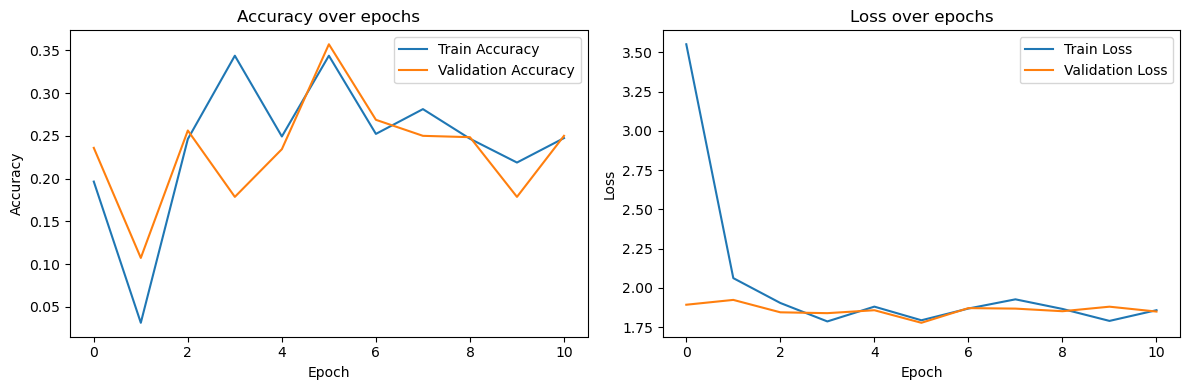

In [10]:
# Plot training history
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.tight_layout()
plt.show()


plt.show()

26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step


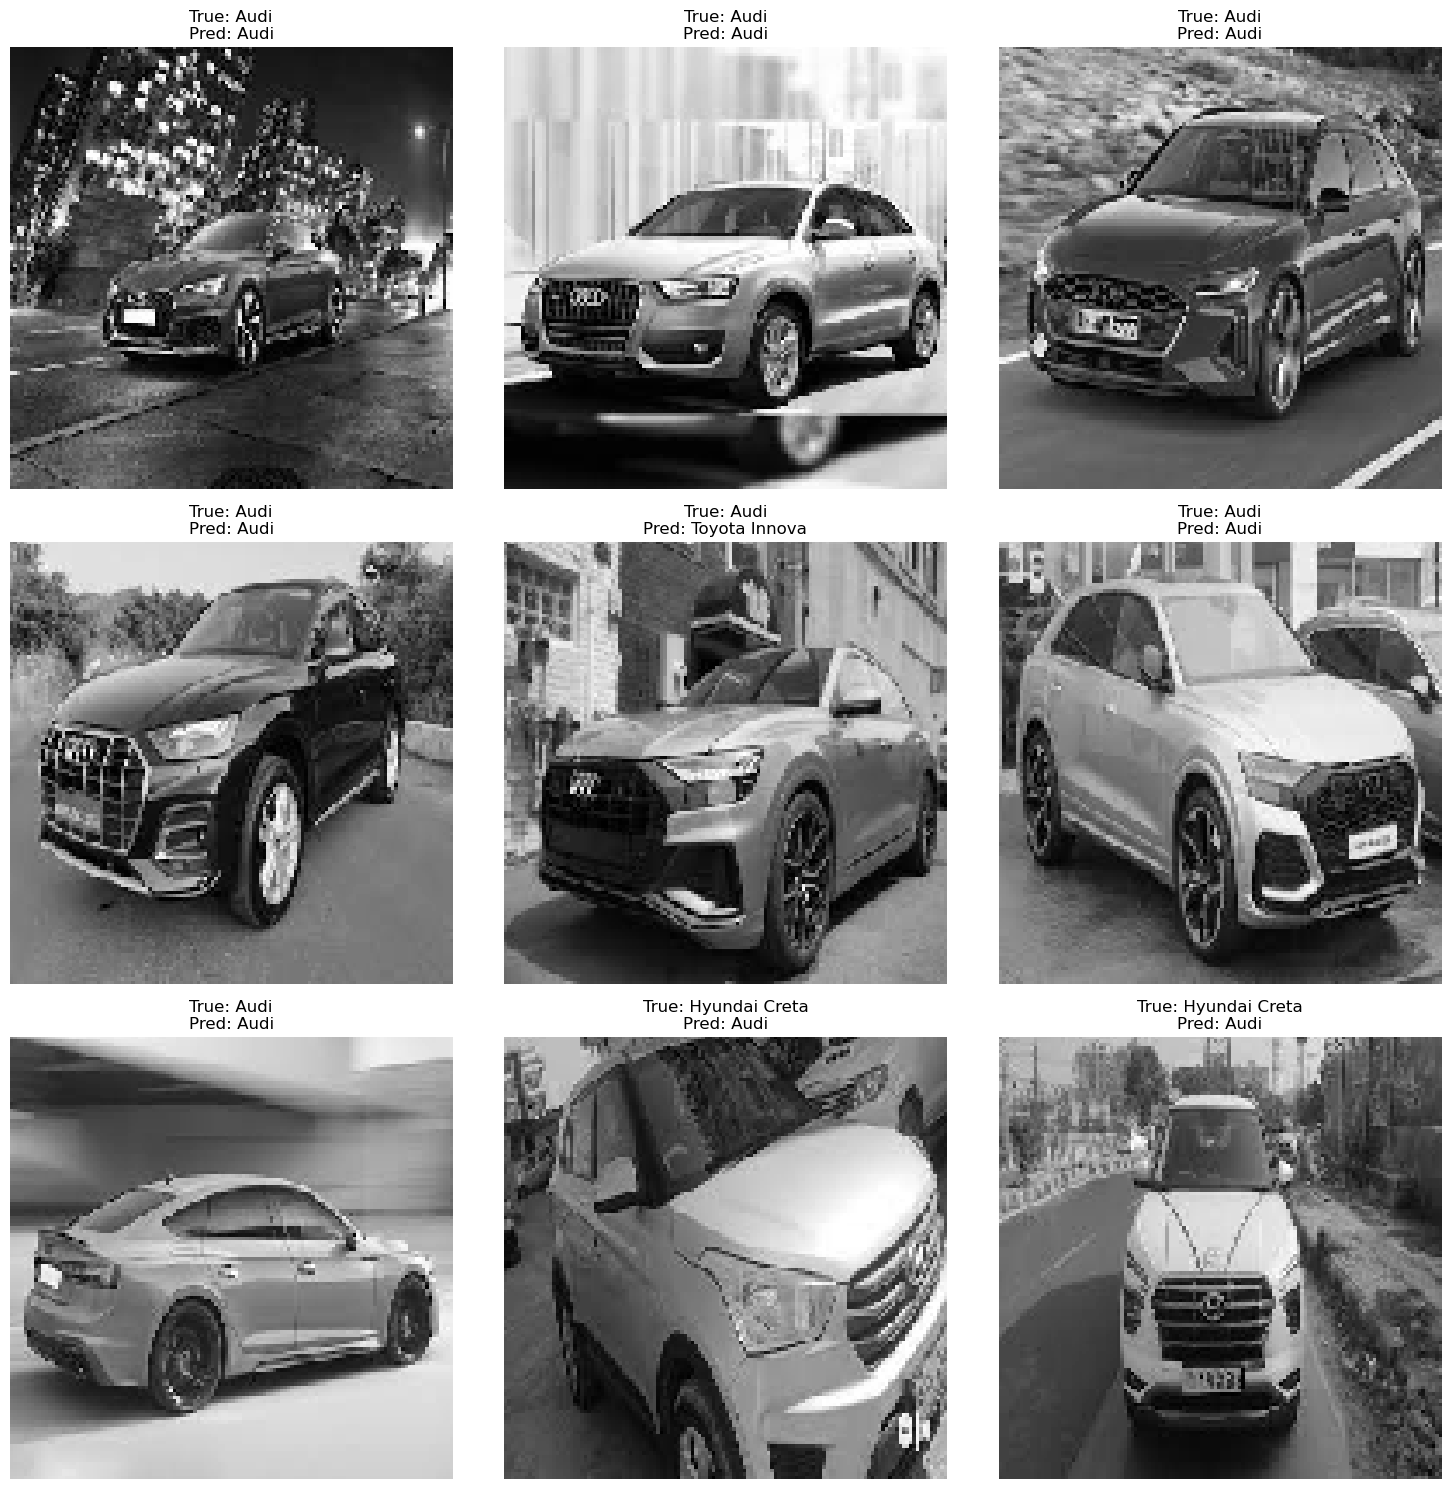

In [12]:
# Make predictions on test set
predictions = model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)

# Reset the test generator before showing examples
test_generator.reset()

# Get class names in order
class_names = list(test_generator.class_indices.keys())

# Show some example predictions
plt.figure(figsize=(15, 15))
for i in range(9):
    plt.subplot(3, 3, i+1)
    
    # Get the next batch - using __next__() instead of next()
    batch = test_generator.__next__()
    img, label = batch[0], batch[1]
    
    true_class = np.argmax(label[0])
    pred_class = predicted_classes[i]
    
    plt.imshow(img[0].reshape(IMAGE_SIZE), cmap='gray')
    plt.title(f"True: {class_names[true_class]}\nPred: {class_names[pred_class]}")
    plt.axis('off')

plt.tight_layout()
plt.show()